# Movie Data Analysis

## Sources for definitions:

Summer movie season definition:
    

![title](img/id4.png)

Dump months definition: https://en.wikipedia.org/wiki/Dump_months
        
![title](img/john_wick.png)

Oscar season Definition: https://en.wikipedia.org/wiki/Oscar_season#:~:text=Oscar%20season%20usually%20begins%20in,and%20dependent%20on%20the%20year

![title](img/oscars.png)

In [ ]:
#John's Code Start's Here

In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

#Load Data
TheData_df = pd.read_csv('DataFiles/FINAL_CLEANED_DF.csv')
Data = TheData_df

#Run .Head()
Data.head()

,Title,Domestic Release Date,Year Released (Domestic),Month Released (Domestic),Infl. Adj. Dom. Box Office,Domestic Box Office,Genre,Oscars Won,Number Oscars Won,Total Oscars Awarded in Year,Percent Oscars Won,Awards,Metascore,IMDB,Rotten Tomatoes,Rated,Director,Runtime,Theatrical Distributor,Country
0,Titanic,1997-12-19,1997,12,1240601558,659363944,Thriller/Suspense,Yes,11.0,24,45.833333,Won 11 Oscars. Another 113 wins & 83 nominations.,75.0,7.8,89%,PG-13,James Cameron,194 min,Paramount Pictures,"USA, Mexico, Australia, Canada"
1,ET: The Extra-Terrestrial,1982-06-11,1982,6,1224582698,435110554,Drama,Yes,4.0,23,17.391304,Won 4 Oscars. Another 48 wins & 35 nominations.,91.0,7.8,98%,PG,Steven Spielberg,115 min,Universal,USA
2,Star Wars Ep. VII: The Force Awakens,2015-12-18,2015,12,1006872847,936662225,Adventure,No,0.0,25,0.000000,Nominated for 5 Oscars. Another 62 wins & 126 ...,80.0,7.9,93%,PG-13,J.J. Abrams,138 min,Walt Disney,USA
3,Avatar,2009-12-18,2009,12,899243135,760507625,Action,Yes,3.0,25,12.000000,Won 3 Oscars. Another 86 wins & 129 nominations.,83.0,7.8,82%,PG-13,James Cameron,162 min,20th Century Fox,USA
4,Star Wars Ep. V: The Empire Strikes Back,1980-05-21,1980,5,880005730,290271960,Adventure,Yes,1.0,22,4.545455,Won 1 Oscar. Another 24 wins & 20 nominations.,82.0,8.7,94%,PG,Irvin Kershner,124 min,20th Century Fox,USA


In [2]:
#Define Data Set Groups
d = {'Month Released (Domestic)': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
     'Data Set': ['Winter Dump Months', 
                    'Winter Dump Months', 
                    'Other Months', 
                    'Other Months', 
                    'Summer Blockbusters',
                    'Summer Blockbusters',
                    'Summer Blockbusters',
                    'Summer Dump Months',
                    'Summer Dump Months',
                    'Other Months',
                    'Oscar Season',
                    'Oscar Season',
                   ]}
DataSets_df = pd.DataFrame(data=d)
DataSets_df

,Month Released (Domestic),Data Set
0,1,Winter Dump Months
1,2,Winter Dump Months
2,3,Other Months
3,4,Other Months
4,5,Summer Blockbusters
5,6,Summer Blockbusters
6,7,Summer Blockbusters
7,8,Summer Dump Months
8,9,Summer Dump Months
9,10,Other Months


In [3]:
SummData = pd.merge(Data, DataSets_df, 
                      how="left", on='Month Released (Domestic)')
SummData.head()

,Title,Domestic Release Date,Year Released (Domestic),Month Released (Domestic),Infl. Adj. Dom. Box Office,Domestic Box Office,Genre,Oscars Won,Number Oscars Won,Total Oscars Awarded in Year,...,Awards,Metascore,IMDB,Rotten Tomatoes,Rated,Director,Runtime,Theatrical Distributor,Country,Data Set
0,Titanic,1997-12-19,1997,12,1240601558,659363944,Thriller/Suspense,Yes,11.0,24,...,Won 11 Oscars. Another 113 wins & 83 nominations.,75.0,7.8,89%,PG-13,James Cameron,194 min,Paramount Pictures,"USA, Mexico, Australia, Canada",Oscar Season
1,ET: The Extra-Terrestrial,1982-06-11,1982,6,1224582698,435110554,Drama,Yes,4.0,23,...,Won 4 Oscars. Another 48 wins & 35 nominations.,91.0,7.8,98%,PG,Steven Spielberg,115 min,Universal,USA,Summer Blockbusters
2,Star Wars Ep. VII: The Force Awakens,2015-12-18,2015,12,1006872847,936662225,Adventure,No,0.0,25,...,Nominated for 5 Oscars. Another 62 wins & 126 ...,80.0,7.9,93%,PG-13,J.J. Abrams,138 min,Walt Disney,USA,Oscar Season
3,Avatar,2009-12-18,2009,12,899243135,760507625,Action,Yes,3.0,25,...,Won 3 Oscars. Another 86 wins & 129 nominations.,83.0,7.8,82%,PG-13,James Cameron,162 min,20th Century Fox,USA,Oscar Season
4,Star Wars Ep. V: The Empire Strikes Back,1980-05-21,1980,5,880005730,290271960,Adventure,Yes,1.0,22,...,Won 1 Oscar. Another 24 wins & 20 nominations.,82.0,8.7,94%,PG,Irvin Kershner,124 min,20th Century Fox,USA,Summer Blockbusters


In [4]:
Summary_df = SummData.groupby("Data Set").agg({'Title':'count', 
                                                'Infl. Adj. Dom. Box Office':'mean'#, 
                                                #'Oscars Won':'count' 
                                              })

Summary_df.head()

#include in final data?

,Title,Infl. Adj. Dom. Box Office
Data Set,,
Oscar Season,441,1.885711e+08
Other Months,275,1.516488e+08
Summer Blockbusters,594,2.116240e+08
Summer Dump Months,177,1.417845e+08
Winter Dump Months,113,1.355740e+08


In [ ]:
# #Make Box Office Look Good
# Summary_df['Infl. Adj. Dom. Box Office'] = Summary_df[
#     'Infl. Adj. Dom. Box Office'].astype(
#      float).map("${:,.2f}".format)

# Summary_df
# #Need to add Average to "Inflation Adjusted Box Office"

![title](img/term2.png)

# Hypothesis 1: 
Summer movies (May through July) tend to make more money than movies released at other times of the year.

Null Hypothesis: Date of release does not impact the amount of money a movie makes.

## Hypothesis 1 - Related questions: 
* Is there a relationship between money made and viewer ratings?
* Is there a relationship between money made and critical rating?


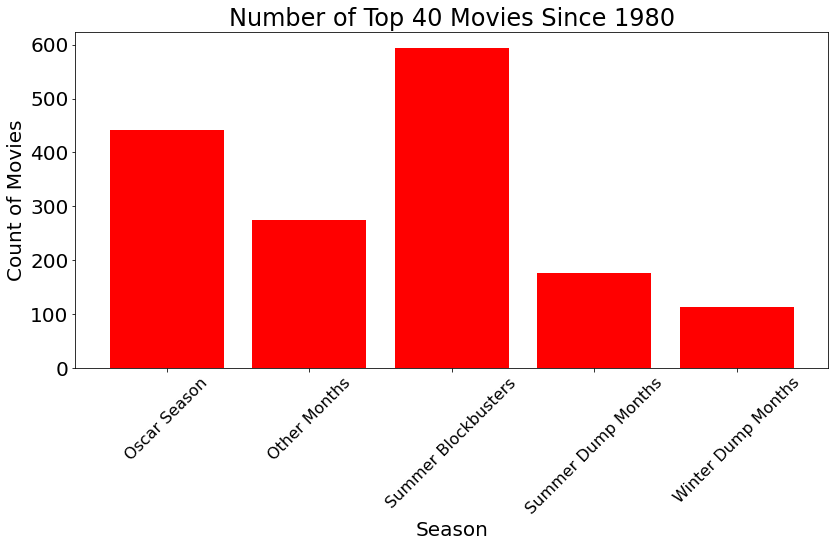

In [5]:
labels = ['Oscar Season', 'Other Months', 'Summer Blockbusters', 
          'Summer Dump Months', 'Winter Dump Months']
titlecount = Summary_df['Title']


x_axis = np.arange(len(labels))  # the label locations

plt.figure(figsize = (12, 8))
plt.rc('font', size=20)
plt.rc('xtick', labelsize=16)

plt.bar(x_axis, titlecount, color='r', align='center')

ticks = [value for value in x_axis]
plt.xticks(ticks, labels, rotation=45)

# Set textual properties
plt.title("Number of Top 40 Movies Since 1980")
plt.ylabel("Count of Movies")
plt.xlabel("Season")
plt.tight_layout()
plt.show()




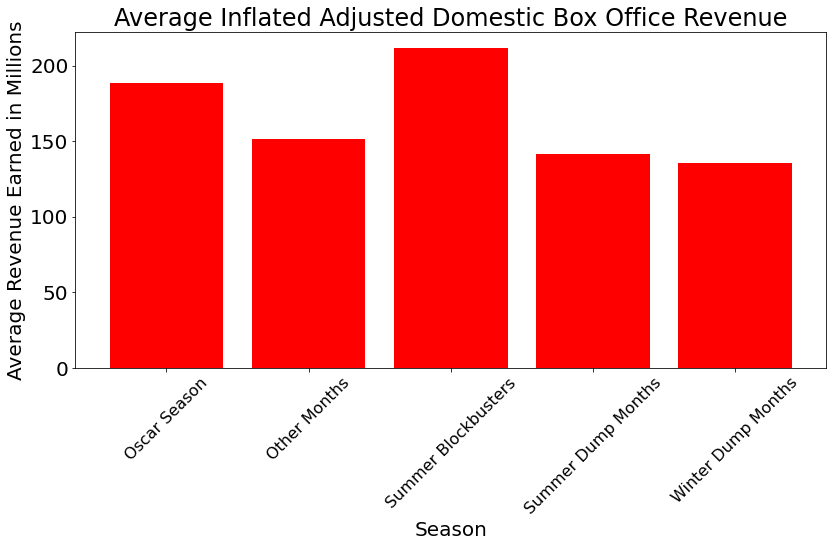

In [6]:
labels2 = ['Oscar Season', 'Other Months', 'Summer Blockbusters', 
          'Summer Dump Months', 'Winter Dump Months']
AveBox = Summary_df['Infl. Adj. Dom. Box Office']/1000000


x_axis2 = np.arange(len(labels2))  # the label locations

plt.figure(figsize = (12, 8))
plt.rc('font', size=20)
plt.rc('xtick', labelsize=16)

plt.bar(x_axis2, AveBox, color='r', align='center')

ticks = [value for value in x_axis2]
plt.xticks(ticks, labels, rotation=45)

# Set textual properties
plt.title("Average Inflated Adjusted Domestic Box Office Revenue")
plt.ylabel("Average Revenue Earned in Millions")
plt.xlabel("Season")
plt.tight_layout()
plt.show()


#figure out how to make this more readable. Y-Axis Sucks

In [ ]:
#John's code ends here

In [ ]:
#Jason's code starts here

In [7]:
SummData.head(5)

,Title,Domestic Release Date,Year Released (Domestic),Month Released (Domestic),Infl. Adj. Dom. Box Office,Domestic Box Office,Genre,Oscars Won,Number Oscars Won,Total Oscars Awarded in Year,...,Awards,Metascore,IMDB,Rotten Tomatoes,Rated,Director,Runtime,Theatrical Distributor,Country,Data Set
0,Titanic,1997-12-19,1997,12,1240601558,659363944,Thriller/Suspense,Yes,11.0,24,...,Won 11 Oscars. Another 113 wins & 83 nominations.,75.0,7.8,89%,PG-13,James Cameron,194 min,Paramount Pictures,"USA, Mexico, Australia, Canada",Oscar Season
1,ET: The Extra-Terrestrial,1982-06-11,1982,6,1224582698,435110554,Drama,Yes,4.0,23,...,Won 4 Oscars. Another 48 wins & 35 nominations.,91.0,7.8,98%,PG,Steven Spielberg,115 min,Universal,USA,Summer Blockbusters
2,Star Wars Ep. VII: The Force Awakens,2015-12-18,2015,12,1006872847,936662225,Adventure,No,0.0,25,...,Nominated for 5 Oscars. Another 62 wins & 126 ...,80.0,7.9,93%,PG-13,J.J. Abrams,138 min,Walt Disney,USA,Oscar Season
3,Avatar,2009-12-18,2009,12,899243135,760507625,Action,Yes,3.0,25,...,Won 3 Oscars. Another 86 wins & 129 nominations.,83.0,7.8,82%,PG-13,James Cameron,162 min,20th Century Fox,USA,Oscar Season
4,Star Wars Ep. V: The Empire Strikes Back,1980-05-21,1980,5,880005730,290271960,Adventure,Yes,1.0,22,...,Won 1 Oscar. Another 24 wins & 20 nominations.,82.0,8.7,94%,PG,Irvin Kershner,124 min,20th Century Fox,USA,Summer Blockbusters


In [8]:
analysis_box_office = SummData[["Year Released (Domestic)", "Infl. Adj. Dom. Box Office", "Data Set"]]
analysis_box_office.head()

,Year Released (Domestic),Infl. Adj. Dom. Box Office,Data Set
0,1997,1240601558,Oscar Season
1,1982,1224582698,Summer Blockbusters
2,2015,1006872847,Oscar Season
3,2009,899243135,Oscar Season
4,1980,880005730,Summer Blockbusters


In [9]:
summer_bb = analysis_box_office[["Infl. Adj. Dom. Box Office", "Data Set"]]
summer_bb.head()

,Infl. Adj. Dom. Box Office,Data Set
0,1240601558,Oscar Season
1,1224582698,Summer Blockbusters
2,1006872847,Oscar Season
3,899243135,Oscar Season
4,880005730,Summer Blockbusters


In [10]:
summerbb_df = summer_bb[summer_bb["Data Set"] == 'Summer Blockbusters']
summerbb_df = summerbb_df.rename(columns={"Data Set": "Release_Group",
                                            "Infl. Adj. Dom. Box Office": "Box_office"
                                      })
summerbb_df.head()

,Box_office,Release_Group
1,1224582698,Summer Blockbusters
4,880005730,Summer Blockbusters
6,847248129,Summer Blockbusters
7,836866856,Summer Blockbusters
8,827550405,Summer Blockbusters


In [11]:
not_summer_df = summer_bb[summer_bb["Data Set"] != 'Summer Blockbusters']
not_summer_df = not_summer_df.rename(columns={"Data Set": "Release_Group",
                                            "Infl. Adj. Dom. Box Office": "Box_office"
                                     })
not_summer_df.head()

,Box_office,Release_Group
0,1240601558,Oscar Season
2,1006872847,Oscar Season
3,899243135,Oscar Season
5,858373000,Other Months
14,700059566,Winter Dump Months


In [12]:
# Calculate Pvalue for Box office amounts usingthe t-test
sts.ttest_ind(summerbb_df.Box_office, not_summer_df.Box_office, equal_var=False)

Ttest_indResult(statistic=6.951498332742322, pvalue=6.513783348780751e-12)

The pvalue is way lower that .05 so we can assert that this disproves the Null Hypothesis that a movies release date has no affect on the money it makes at the box office. 

Successfully rejected the null hypothesis

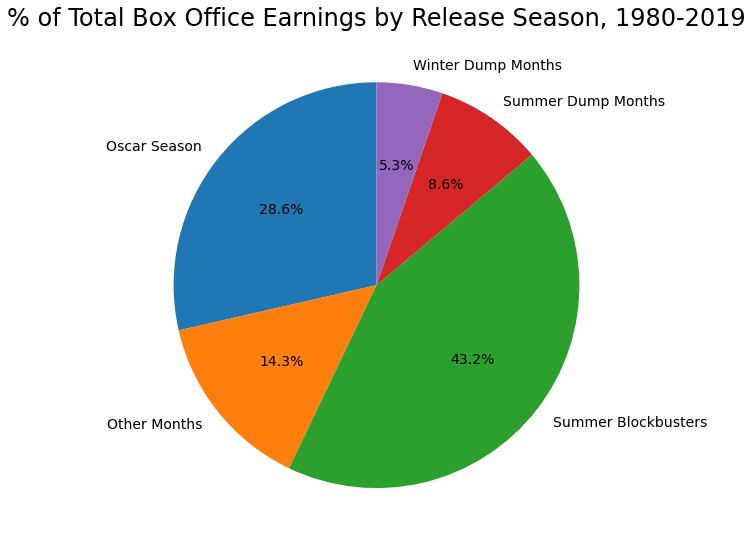

In [14]:
# The index can be reset to provide index numbers based on the new rankings.
pie_df = analysis_box_office[["Infl. Adj. Dom. Box Office", "Data Set"]]
pie_df.head()

grouped_by_group = pie_df.groupby(["Data Set"])
grouped_df = grouped_by_group["Infl. Adj. Dom. Box Office"].sum()

groups_cnts_df = pd.DataFrame({"Sums": grouped_df})

# place gender keys for the sums
group_list = groups_cnts_df.keys()

plt.figure(figsize = (20, 20))

ax1 = plt.subplot(121, aspect='equal')
movie_pie = groups_cnts_df.plot(kind="pie", y=group_list[0], ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=14, 
 title=("% of Total Box Office Earnings by Release Season, 1980-2019"))
movie_pie.set_ylabel(None)

plt.show()

In [ ]:
#Jason's code ends here

In [ ]:
#Marianne's code starts here

![title](img/rw_oscars.png)

## Hypothesis 2 - Related questions:
* Does box office success equate to more awards success? 
* Do viewer ratings correlate with oscar wins? 
* Do critic ratings correlate with oscar wins?

 Null Hypothesis: Date released does not have any relationship to Oscars won.

In [ ]:
# Total Number of Oscars Won by Data Group (Time of Year) Bar Chart - Marianne


# SummData.head()

Oscar_Time_of_Year = SummData.groupby("Data Set").agg({"Data Set":"count","Number Oscars Won":"sum"})
Oscar_Time_of_Year.columns.values[0] = "Number of Movies"

allMovies = Oscar_Time_of_Year["Number of Movies"].sum()
allOscars = Oscar_Time_of_Year["Number Oscars Won"].sum()

Oscar_Time_of_Year["% of All Movies"] = Oscar_Time_of_Year["Number of Movies"] / allMovies * 100

Oscar_Time_of_Year["% of All Oscars"] = Oscar_Time_of_Year["Number Oscars Won"] / allOscars * 100


Oscar_Time_of_Year



# Summary_df = SummData.groupby("Data Set").agg({'Title':'count', 
#                                                 'Infl. Adj. Dom. Box Office':'mean'#, 
#                                                 #'Oscars Won':'count' 
#                                               })



In [ ]:
ind = np.arange(len(Oscar_Time_of_Year))
width = 0.4

fig, ax = plt.subplots()
ax.barh(ind, Oscar_Time_of_Year['Number Oscars Won'], width, color='gold', label='Oscars Won')
ax.barh(ind + width, Oscar_Time_of_Year['Number of Movies'], width, color='blue', label='Total Movies Released')


ax.set(yticks=ind + width, yticklabels=Oscar_Time_of_Year.index.values, ylim=[2*width - 1, len(Oscar_Time_of_Year)])
ax.legend()
ax.set_title('Oscars and Movies Released by Time of Year')
plt.ylabel("Time of Year")
plt.xlabel("Time of Year")
plt.show()


The highest proportion of Oscars Won is from movies released during Oscar Season, however this doesn't really paint an accurate picture. Comparing the raw number of movies doesn't tell the whole story - seeing the relative proportion of movies in each category tells a better story. (See below.)

In [ ]:
ind = np.arange(len(Oscar_Time_of_Year))
width = 0.4

fig, ax = plt.subplots()
ax.barh(ind, Oscar_Time_of_Year['% of All Oscars'], width, color='gold', label='% of All Oscars Won')
ax.barh(ind + width, Oscar_Time_of_Year['% of All Movies'], width, color='blue', label='% All Movies Released')


ax.set(yticks=ind + width, yticklabels=Oscar_Time_of_Year.index.values, ylim=[2*width - 1, len(Oscar_Time_of_Year)])
ax.legend()
ax.set_title('Oscars and Movies Released by Time of Year')
plt.ylabel("Time of Year")
plt.xlabel("Percentage of Movies")
plt.show()

Comparing the percentages is a better way to see the picture of Oscar success based on time of year. 53.8% of all Oscar winners are released during Oscar season, but only 27.7% of all movies come out during that time of year, meaning movies released during Oscar season are far more likely to win awards. It's also interesting to note that, while Summer Blockbusters win fewer awards than we would expect if time of year didn't matter, it's the second most likely release timeframe for awards.

In [ ]:
#marianne's code ends here

In [ ]:
#jason's code starts here

In [17]:
analysis_oscars = SummData[["Number Oscars Won", "Data Set"]]
analysis_oscars.head(100)

,Number Oscars Won,Data Set
0,11.0,Oscar Season
1,4.0,Summer Blockbusters
2,0.0,Oscar Season
3,3.0,Oscar Season
4,1.0,Summer Blockbusters
...,...,...
95,0.0,Summer Blockbusters
96,0.0,Summer Blockbusters
97,4.0,Oscar Season
98,0.0,Summer Blockbusters


In [18]:
oscar_season_df = analysis_oscars[analysis_oscars["Data Set"] == 'Oscar Season']
oscar_season_df = oscar_season_df.rename(columns={"Data Set": "Release_Group",
                                            "Number Oscars Won": "Oscars"
                                      })
oscar_season_df.head()

,Oscars,Release_Group
0,11.0,Oscar Season
2,0.0,Oscar Season
3,3.0,Oscar Season
20,0.0,Oscar Season
22,0.0,Oscar Season


In [19]:
non_oscar_season_df = analysis_oscars[analysis_oscars["Data Set"] != 'Oscar Season']
non_oscar_season_df = non_oscar_season_df.rename(columns={"Data Set": "Release_Group",
                                            "Number Oscars Won": "Oscars"
                                      })
non_oscar_season_df.head()

,Oscars,Release_Group
1,4.0,Summer Blockbusters
4,1.0,Summer Blockbusters
5,0.0,Other Months
6,0.0,Summer Blockbusters
7,3.0,Summer Blockbusters


In [20]:
# Calculate Pvalue for Box Office Wins using the t-test
sts.ttest_ind(oscar_season_df.Oscars, non_oscar_season_df.Oscars, equal_var=False)

Ttest_indResult(statistic=5.779873658914818, pvalue=1.2834332139259976e-08)

The pvalue is significantly lower that .05 so we can assert that this disproves the Null Hypothesis that a movies release date has no affect on the success of winning Oscars. 

Successfully rejected the null hypothesis

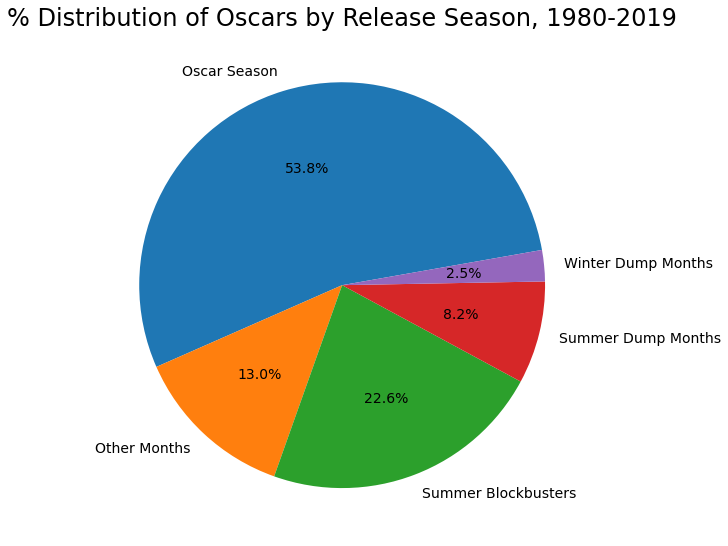

In [22]:
# Build a Pie Chart to convey the Oscars Distribution.
pie2_df = analysis_oscars[["Number Oscars Won", "Data Set"]]
pie2_df.head()

oscars_by_group = pie2_df.groupby(["Data Set"])
grouped_oscar_df = oscars_by_group["Number Oscars Won"].sum()

groups_oscar_cnts_df = pd.DataFrame({"Sums": grouped_oscar_df})

# place gender keys for the sums
group_oscar_list = groups_oscar_cnts_df.keys()

plt.figure(figsize = (20, 20))

ax1 = plt.subplot(121, aspect='equal')
movie_oscar_pie = groups_oscar_cnts_df.plot(kind="pie", y=group_oscar_list[0], ax=ax1, autopct='%1.1f%%', 
 startangle=10, shadow=False, legend = False, fontsize=14, title=("% Distribution of Oscars by Release Season, 1980-2019"))
movie_oscar_pie.set_ylabel(None)

plt.show()

In [ ]:
#jason's code ends here

In [ ]:
#marianne's code starts here

In [ ]:
# Scatterplot of IMDB ratings vs. oscars won (for the top oscar winners) - with regression line - Marianne

x_values = SummData['Number Oscars Won']
y_values = SummData['IMDB']

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#create plot
plt.figure(figsize=(6, 4), dpi=80)
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

#create line equation and annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=15,color="red")

#label the axes and create title
plt.xlabel("Number of Oscars Won")
plt.ylabel("Average IMDB Rating")
plt.title("Average IMDB Rating vs Oscars Won")

#calculate and print r squared to determine strength of correlation
print(f'The r-squared is: {rvalue**2}')

plt.show()

Based on this regression line and the r-squared, there doesn't appear to be a correlation between awards won and viewer rating. While there aren't many movies winning Oscars with low ratings, there is a large number of highly rated movies winning no Oscars.

In [ ]:
# Scatterplot of metaScore ratings vs. oscars won (for the top oscar winners) - with regression line - Marianne

metaScore = SummData.dropna(subset=['Metascore'])

x_values = metaScore['Number Oscars Won']
y_values = metaScore['Metascore']

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#create plot
plt.figure(figsize=(6, 4), dpi=80)
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

#create line equation and annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=15,color="red")

#label the axes and create title
plt.xlabel("Number of Oscars Won")
plt.ylabel("Metascore")
plt.title("Metascore Rating vs Oscars Won")

#calculate and print r squared to determine strength of correlation
print(f'The r-squared is: {rvalue**2}')

plt.show()

With an r-squared of .168, there is little correlation between critical ratings and Oscar success. 

In [ ]:
# Scatter Plot of box office vs number of oscars won

x_values = SummData['Number Oscars Won']
y_values = SummData['Infl. Adj. Dom. Box Office']

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#create plot
plt.figure(figsize=(6, 4), dpi=80)
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

#create line equation and annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=15,color="red")

#label the axes and create title
plt.xlabel("Number of Oscars Won")
plt.ylabel("Inflation Adjusted Domestic Box Office (Millions of Dollars)")
plt.title("Box Office vs Oscars Won")

#calculate and print r squared to determine strength of correlation
print(f'The r-squared is: {rvalue**2}')

plt.show()

This regression shows that there is no real correlation between box office success and awards won, as the r-squared is .054, even lower than the other regressions run on Oscars.

In [ ]:
#Create the lists of box office values for the box plot

OscarsOnly_df = SummData.loc[SummData['Oscars Won'] == 'Yes'] #filter the dataframe to oscar winners

OscarMoney = OscarsOnly_df['Infl. Adj. Dom. Box Office']       #save the list of box office values of oscar winners


NoOscars_df = SummData.loc[SummData['Oscars Won'] == 'No']     #filter the dataframe to non-oscar winners
    
OscarlessMoney = NoOscars_df['Infl. Adj. Dom. Box Office']     #save the list of box office values of non-winners
    


In [ ]:
# Create a box plot comparing the box office of oscar winners vs. non winners

#Create the list of all movies
allMovies = [OscarMoney, OscarlessMoney]

#plot the data
fig, ax = plt.subplots()
ax.boxplot(allMovies)

# change outlier point symbols
ax.boxplot(allMovies, 0, 'x')

#label the graph
ax.set_xticklabels(['Oscar Winners', 'No Oscars'])
ax.set_ylabel('Inflation Adjusted Domestic Box Office (Millions of Dollars)')
ax.set_title('Box Office by Oscar Winner Status')

#look at adjusting values to remove exponent
# set yticks

plt.show()

Based on this plot, Oscar winners have a wider range of box office earnings. However, both datasets have a large number of outliers that can skew other analyses. Based on this, the majority of movies don't actually make much money. The ones that most people are aware of are the outliers.

In [ ]:
#Marianne's code ends here

# Bonus analysis:
What impact does genre have on box office and awards?

![title](img/titanic.png) (You knew it was coming eventually).

In [ ]:
#Nicole's code starts here

In [ ]:
# Load cleaned data
FINAL_CLEANED_DF = pd.read_csv('DataFiles/FINAL_CLEANED_DF.csv')

In [ ]:
# Account for NaN values in genre
FINAL_CLEANED_DF['Genre'] = FINAL_CLEANED_DF['Genre'].fillna('Unspecified')

In [ ]:
# Genre Groupby
genre_df = FINAL_CLEANED_DF.groupby('Genre').agg({'Genre':'count','Infl. Adj. Dom. Box Office':
                                                ['sum', 'mean'], 'Number Oscars Won': 'sum'})
# Genre DataFrame
genre_df.columns = ['# of Movies', 'Box Office Sum', 'Box Office Mean', 'Oscars Won']

# Reset index so genre turned into a column
genre_df = genre_df.reset_index()

# Change Oscars Won to integer
genre_df['Oscars Won'] = genre_df['Oscars Won'].astype(int)

# Change Box Office format from exponent to integer
genre_df['Box Office Mean'] = genre_df['Box Office Mean'].astype('int64')

# Display Genre DataFrame
genre_df

In [ ]:
# Pie Chart of Oscars Won Per Genre

# Removing Zero Values to make plot look nicer
non_zero_values_df = genre_df.loc[(genre_df['Oscars Won'] > 0), :].sort_values('Oscars Won')

# Create Plot
oscars = non_zero_values_df['Oscars Won']
labels = non_zero_values_df['Genre']
plt.rc('font', size = 12)
colors = ['pink', 'dimgray', 'peru', 'deeppink', 'darkviolet', 'plum',
          'tomato', 'limegreen', 'y', 'darkturquoise']
fig, ax = plt.subplots()
ax.axis('equal')
pie = ax.pie(oscars, radius=2.55, colors=['k'])
pie2 = ax.pie(oscars, radius=2.5, labels = labels, labeldistance = 1.06, autopct = '%1.1f%%',
             startangle=200, colors = colors)
fig.suptitle('Percent of Oscars Won By Genre', fontsize=16, y= 1.4)

plt.show()

In [ ]:
# Bar Chart of Total Box Office Sales Per Genre
revenue = genre_df['Box Office Sum']
genre = genre_df['Genre']
colors = ['limegreen', 'y', 'gray', 'darkviolet', 'yellowgreen', 'pink',
          'darkturquoise', 'dimgray', 'plum', 'deeppink', 'tomato', 'orange', 'peru']
plt.figure(figsize = (12,6))
plt.bar(genre, revenue, color = colors)
yticks = np.arange(0, 100000000000, 10000000000)
ylabels = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.yticks(ticks = yticks, labels = ylabels)
plt.xticks(rotation = 90)
plt.title("Total Box Office Sales Per Genre")
plt.xlabel('Genre')
plt.ylabel('Box Office Sales (billions)')

# plt.tight_layout() 

plt.show()

In [ ]:
# Bar Chart of Mean Box Office Sales Per Genre
revenue = genre_df['Box Office Mean']
genre = genre_df['Genre']
plt.figure(figsize = (12,6))
plt.bar(genre, revenue, color = colors)
yticks = np.arange(0, 250000000, 25000000)
ylabels = [0, 25, 50, 75, 100, 125, 150, 175, 200, 250]
plt.yticks(ticks = yticks, labels = ylabels)
plt.xticks(rotation = 90)
plt.title("Mean Box Office Sales Per Genre")
plt.xlabel('Genre')
plt.ylabel('Box Office Sales (millions)')
plt.rc('xtick' , labelsize = 14)
# plt.tight_layout() 

plt.show()

In [ ]:
revenue_sum = genre_df['Box Office Sum']
revenue_mean = genre_df['Box Office Mean']
genre = genre_df['Genre']

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Box Office Sales Per Genre')
# plt.figure(figsize = (12,3))
plt.xticks(rotation = 90)


ax1.bar(genre, revenue_sum, color = colors)
ax1.set_ylabel('Revenue')
ax1.set_title('xxx')

ax2.bar(genre, revenue_mean, color = colors)
ax2.set_ylabel('Revenue')
ax2.set_title('yyy')


# plt.tight_layout() 
plt.show()

# Class Bonus: 
## What are the top 5 box office movies of the last 40 years? (Adjusted for Inflation)

## What are the top 5 oscar winners of the last 40 years?

In [ ]:
#Nicole's code ends here